In [3]:
 import numpy as np
 import pandas as pd
 import seaborn as sns
 import matplotlib.pyplot as plt
 import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import requests
from bs4 import BeautifulSoup
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
from google.colab import files
uploaded = files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [10]:
data = pd.read_csv("Elon_musk.csv",encoding = "cp1252")

In [11]:
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [12]:
data = data["Text"]
# select the text columns only

In [13]:
df= pd.DataFrame(data)

In [14]:
df.head()

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [19]:
def preprocessing(text):

    text=text.lower()
    text = re.sub(r'http\S+', '', text, flags=re.MULTILINE)

    return text
# data preprocessing{regular expresion substitution based on string}

In [20]:
df["cleaned_Text"]=df["Text"].apply(preprocessing)


In [21]:
df.head()

,Text,cleaned_Text
0,@kunalb11 I’m an alien,@kunalb11 i’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,@id_aa_carmack ray tracing on cyberpunk with h...
2,@joerogan @Spotify Great interview!,@joerogan @spotify great interview!
3,@gtera27 Doge is underestimated,@gtera27 doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,@teslacn congratulations tesla china for amazi...


In [22]:
df["cleaned_Text"] = df['cleaned_Text'].apply(lambda x: re.sub(r'@[^\s]+', '', x))
# remove Twitter usernames (strings that start with "@" followed by non-whitespace characters)

In [23]:
df.head()

,Text,cleaned_Text
0,@kunalb11 I’m an alien,i’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is next-lev...
2,@joerogan @Spotify Great interview!,great interview!
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...


In [24]:
pd.set_option('max_colwidth',500)
#set the maximum columns width

In [25]:
df['cleaned_Text']=[re.sub('[^A-Za-z ]+','',x)for x in df.cleaned_Text]
# remove non-alphabetic characters keep onely(letters & spaces)

In [26]:
df.head()

,Text,cleaned_Text
0,@kunalb11 I’m an alien,im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,ray tracing on cyberpunk with hdr is nextlevel have you tried it
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,congratulations tesla china for amazing execution last year now on to the next for even more


In [27]:
short = re.compile(r'\W*\b\w{1,3}\b')
df['cleaned_Text']=[short.sub('',x)for x in df.cleaned_Text]
#remove short words (words with 1 to 3 characters)

In [28]:
df.head()

,Text,cleaned_Text
0,@kunalb11 I’m an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,tracing cyberpunk with nextlevel have tried
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,congratulations tesla china amazing execution last year next even more


In [29]:
df['cleaned_Text'] = df['cleaned_Text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords.words("english")]))
#split the sentance into word , remove the stop words,join the words into sentance again
#join  takes a list of strings and concatenates them into a single string.
# split break a string into a list of substrings based on a specified delimiter.

In [30]:
df.head()

,Text,cleaned_Text
0,@kunalb11 I’m an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,tracing cyberpunk nextlevel tried
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,congratulations tesla china amazing execution last year next even


In [31]:
tweet_merge = [x.strip() for x in df.cleaned_Text]
# removes any leading (spaces at the beginning) and trailing (spaces at the end) whitespace characters from the string

In [32]:
tweet_merge[:5]

['alien',
 'tracing cyberpunk nextlevel tried',
 'great interview',
 'doge underestimated',
 'congratulations tesla china amazing execution last year next even']

In [33]:
tweet_merge = [x for x in tweet_merge if x]
#filters out any empty or falsy strings from the tweets_merge list.

In [34]:
tweet_merge[:20]

['alien',
 'tracing cyberpunk nextlevel tried',
 'great interview',
 'doge underestimated',
 'congratulations tesla china amazing execution last year next even',
 'happy year',
 'frodo underdogeall thought would failhimself',
 'haha thanks',
 'indeed tweets definitely represent realworld time allocation',
 'entertaining outcome likely',
 'sent',
 'agree clubhouse',
 'getting real',
 'bought dogecoin toddler hodler',
 'definitely issues sentencing seems high',
 'thanks fixing',
 'please unlock account',
 'ufuf',
 'true power haha',
 'crypto wallet wont give private keys avoided costs']

In [35]:
tweet_merge = ' '.join(tweet_merge)
# join the all sentance into paragraph

In [37]:
tweet_merge

'alien tracing cyberpunk nextlevel tried great interview doge underestimated congratulations tesla china amazing execution last year next even happy year frodo underdogeall thought would failhimself haha thanks indeed tweets definitely represent realworld time allocation entertaining outcome likely sent agree clubhouse getting real bought dogecoin toddler hodler definitely issues sentencing seems high thanks fixing please unlock account ufuf true power haha crypto wallet wont give private keys avoided costs sucks nasa selected falcon heavy launch first elements lunar gateway together mission predict cash flow reasonably well starlink starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost carbon sequestered value product made must scalable meant price countries difference taxes shipping intended earth ideas apply mars ufuf xprize team manage carbon capture prize everyone tesla receives stock comp stockopt

Text Normalization & Lemmatization and stemming, on a list of words.

In [38]:
#from nltk.stem import PorterStemmer

In [40]:
stemmer = PorterStemmer()
# stemming the word convert into the root word example: running is run

In [41]:
tweet = [stemmer.stem(t) for t in tweet_merge.split()]

In [42]:
tweet[:20]

['alien',
 'trace',
 'cyberpunk',
 'nextlevel',
 'tri',
 'great',
 'interview',
 'doge',
 'underestim',
 'congratul',
 'tesla',
 'china',
 'amaz',
 'execut',
 'last',
 'year',
 'next',
 'even',
 'happi',
 'year']

Counting the Possitive and Negative Opinion words


In [43]:
freq_stp = pd.Series(tweet).value_counts()

In [44]:
freq_stp
x=freq_stp.sort_values(ascending=False)[:20]


<Axes: >

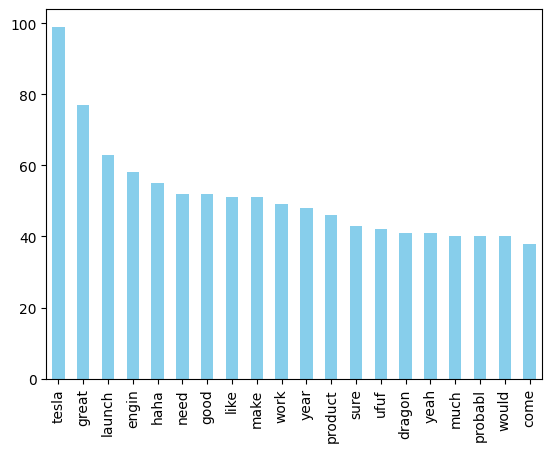

In [45]:

x.plot(kind='bar', color='skyblue')

In [46]:
from wordcloud import WordCloud

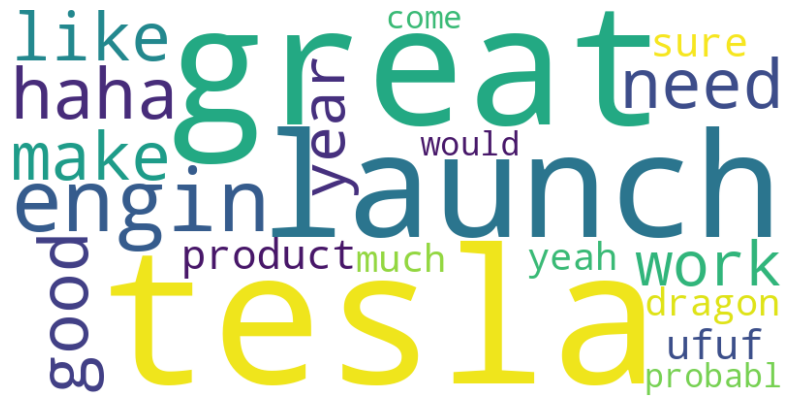

In [48]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(x)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [49]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [50]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [51]:
si = SentimentIntensityAnalyzer()

In [52]:
df.head()

,Text,cleaned_Text
0,@kunalb11 I’m an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,tracing cyberpunk nextlevel tried
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,congratulations tesla china amazing execution last year next even


In [53]:
df["Sentiment_Score"] = df["cleaned_Text"].apply(lambda x: si.polarity_scores(x)["compound"])

In [54]:
df.head()

,Text,cleaned_Text,Sentiment_Score
0,@kunalb11 I’m an alien,alien,0.0000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,tracing cyberpunk nextlevel tried,0.0000
2,@joerogan @Spotify Great interview!,great interview,0.6249
3,@gtera27 Doge is underestimated,doge underestimated,-0.2732
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,congratulations tesla china amazing execution last year next even,0.8271


In [55]:
sentiment_labels = []

for x in df["Sentiment_Score"]:
    if x > 0:
        sentiment_labels.append("Positive")
    elif x < 0:
        sentiment_labels.append("Negative")
    else:
        sentiment_labels.append("Neutral")

In [56]:
df["sentiment_labels"] = sentiment_labels

In [57]:
df.head()

,Text,cleaned_Text,Sentiment_Score,sentiment_labels
0,@kunalb11 I’m an alien,alien,0.0000,Neutral
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,tracing cyberpunk nextlevel tried,0.0000,Neutral
2,@joerogan @Spotify Great interview!,great interview,0.6249,Positive
3,@gtera27 Doge is underestimated,doge underestimated,-0.2732,Negative
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,congratulations tesla china amazing execution last year next even,0.8271,Positive


In [58]:
positive = len(df[df["sentiment_labels"]=="Positive"])

In [59]:
print(f"Total Positive words = {positive}")

Total Positive words = 800


In [60]:
negative = len(df[df["sentiment_labels"]=="Negative"])

In [61]:
print(f"Total Negative words = {negative}")

Total Negative words = 184


In [62]:
 neutral = len(df[df["Sentiment_Score"]==0])

In [63]:
print( f" Total Neutral words = {neutral}")

 Total Neutral words = 1015


In [64]:
per_pos = (positive/len(df))*100
per_neg = (negative/len(df))*100
per_nue = (neutral/len(df))*100

In [65]:
per_pos,per_neg,per_nue

(40.0200100050025, 9.204602301150576, 50.775387693846916)

In [66]:
category = df["sentiment_labels"].value_counts()

<Axes: xlabel='sentiment_labels', ylabel='count'>

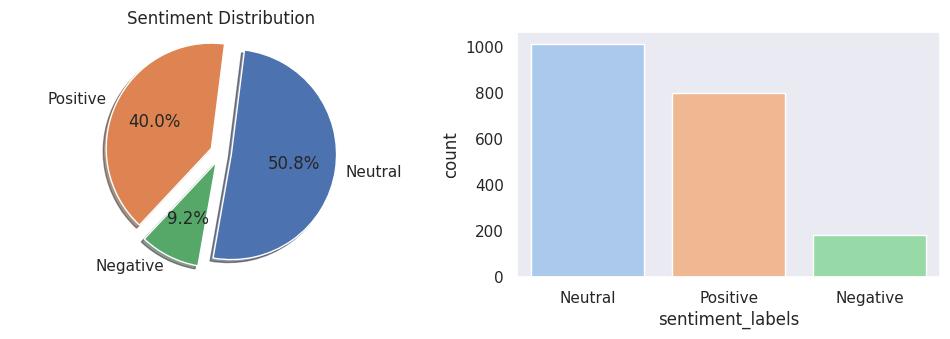

In [67]:
plt.figure(figsize=(12,7))
sns.set(style="dark")

plt.subplot(2,2,1)
plt.pie(x=category, explode=(0.1,0.1,0.1),labels=category.index, autopct='%1.1f%%', shadow=True, startangle=260)
plt.axis('equal')
plt.title("Sentiment Distribution")

plt.subplot(2,2,2)
sns.countplot(x=df["sentiment_labels"],palette="pastel")

In [69]:
x1 = si.polarity_scores(tweet_merge)
x1
# combined string of multiple tweets (forming a paragraph) we can be used this one for find the polarity_scores

{'neg': 0.063, 'neu': 0.659, 'pos': 0.277, 'compound': 1.0}

In [ ]:
# compound score is 1 is Possitive Sentiment

Using TextBlob

In [72]:
from textblob import TextBlob

In [73]:
df.sample()

,Text,cleaned_Text,Sentiment_Score,sentiment_labels
1016,@enn_nafnlaus When Eberhard was fired from the Tesla CEO role in mid 2007 for providing false information to me &amp; t… https://t.co/8hJ3VlxZfP,eberhard fired tesla role providing false information,-0.5574,Negative


In [77]:
tweet_merge

'alien tracing cyberpunk nextlevel tried great interview doge underestimated congratulations tesla china amazing execution last year next even happy year frodo underdogeall thought would failhimself haha thanks indeed tweets definitely represent realworld time allocation entertaining outcome likely sent agree clubhouse getting real bought dogecoin toddler hodler definitely issues sentencing seems high thanks fixing please unlock account ufuf true power haha crypto wallet wont give private keys avoided costs sucks nasa selected falcon heavy launch first elements lunar gateway together mission predict cash flow reasonably well starlink starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost carbon sequestered value product made must scalable meant price countries difference taxes shipping intended earth ideas apply mars ufuf xprize team manage carbon capture prize everyone tesla receives stock comp stockopt

In [78]:
analysis = TextBlob(tweet_merge)

In [79]:
sentiment_score = analysis.sentiment.polarity

In [80]:
sentiment_score

0.18973928249144348

In [82]:
analysis.sentiment
#Polarity is a measure of how positive or negative a piece of text is. It ranges from -1 (most negative) to 1 (most positive).


Sentiment(polarity=0.18973928249144348, subjectivity=0.5132655352972351)

In [83]:
#slighly possitive sentiment